In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# 熟悉数据内容

## load_data

data = pd.read_csv('presidential_polls.csv')

## 查看数据

data.head()

## 美国有多少个州？
data.groupby("state").groups.keys()


## 数据常用统计量
data.describe()


## query操作

# 取出评级为C-的数据
data.query("grade == '%s'" % 'C-')

## 日期数据处理

# 建议阅读此网页了解python日期的基本操作：https://docs.python.org/2/library/datetime.html

from datetime import datetime, date, time

# 字符串转化为python日期对象
t1 = datetime.strptime("21/1/2006 11:54:05", "%d/%m/%Y %H:%M:%S")

#python日期对象转换为字符串
datetime.strftime(t1, "%Y-%m-%d")

## 列数据自定义函数处理

# Series.apply(func, convert_dtype=True, args=(), **kwds)[source]

# 日志字符串转化为date对象
data.startdate.apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

## 增加一列
data["new_startdate"] = data.startdate.apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
data['w_rawpoll_trump'] = data['poll_wt'] * data['rawpoll_trump']

## 指定value排序

data.sort_values(["startdate"])

## 按index排序
t = data.groupby("startdate").sum()
t.sort_index()


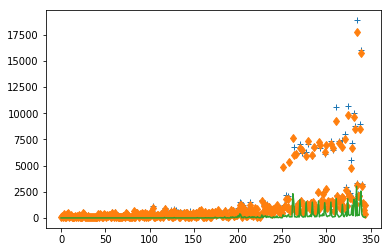

In [36]:
data = pd.read_csv('presidential_polls.csv')
data["new_startdate"] = data.startdate.apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

t = data.groupby("new_startdate").sum()
t = t.sort_index()
trump = t.rawpoll_trump.values
clinton = t.rawpoll_clinton.values
johnson = t.rawpoll_johnson.values

plt.plot(clinton,'+')
plt.plot(trump,'d')
plt.plot(johnson)


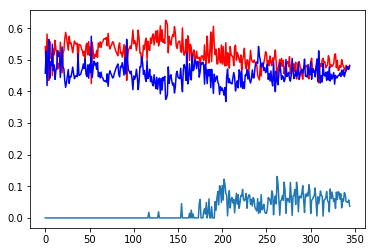

In [37]:
data = pd.read_csv('presidential_polls.csv')
data["new_startdate"] = data.startdate.apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

t = data.groupby("new_startdate").sum()
t = t.sort_index()
trump = t.rawpoll_trump.values
clinton = t.rawpoll_clinton.values
johnson = t.rawpoll_johnson.values

all_poll = clinton + trump + johnson

plt.plot(clinton/all_poll, 'r')
plt.plot(trump/all_poll, 'b')
plt.plot(johnson/all_poll)

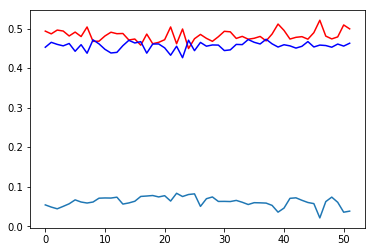

In [47]:
data = pd.read_csv('presidential_polls.csv')
data["new_startdate"] = data.startdate.apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
days = data.new_startdate.values
days.sort()
data["week_index"] = data.new_startdate.apply(lambda x: int((x - days[0]).days / 7))

t = data.groupby("week_index").sum()
t = t.sort_index()
trump = t.rawpoll_trump.values
clinton = t.rawpoll_clinton.values
johnson = t.rawpoll_johnson.values

all_poll = clinton + trump + johnson

plt.plot(clinton/all_poll, 'r')
plt.plot(trump/all_poll, 'b')
plt.plot(johnson/all_poll)


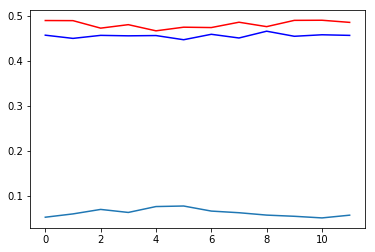

In [49]:
data = pd.read_csv('presidential_polls.csv')
data["new_startdate"] = data.startdate.apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
days = data.new_startdate.values
days.sort()
data["month_index"] = data.new_startdate.apply(lambda x:  datetime.strftime(x, "%Y%m"))

t = data.groupby("month_index").sum()
t = t.sort_index()
trump = t.rawpoll_trump.values
clinton = t.rawpoll_clinton.values
johnson = t.rawpoll_johnson.values

all_poll = clinton + trump + johnson

plt.plot(clinton/all_poll, 'r')
plt.plot(trump/all_poll, 'b')
plt.plot(johnson/all_poll)
